Machine-Learning-Disease-Prediction-And-Drug


In [4]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r"C:\Users\srini\OneDrive\Desktop\disease2drug\dataset\Training.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
test=pd.read_csv(r"C:\Users\srini\OneDrive\Desktop\disease2drug\dataset\Testing.csv")
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
df.shape


(4920, 133)

In [8]:

# prognosis_mapping={'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
# 'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
# 'Migraine':11,'Cervical spondylosis':12,
# 'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
# 'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
# 'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
# 'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
# '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
# 'Impetigo':40}
prognosis_mapping = {category: index for index, category in enumerate(df['prognosis'].unique())}


df['prognosis_numeric'] = df['prognosis'].map(prognosis_mapping)
df.head

<bound method NDFrame.head of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0  

In [9]:
symptoms=df.columns.to_list()
symptoms.pop()
symptoms.pop()
symptoms

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [10]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [11]:
df.isna().count()

itching                 4920
skin_rash               4920
nodal_skin_eruptions    4920
continuous_sneezing     4920
shivering               4920
                        ... 
blister                 4920
red_sore_around_nose    4920
yellow_crust_ooze       4920
prognosis               4920
prognosis_numeric       4920
Length: 134, dtype: int64

In [12]:
x=df.drop(['prognosis','prognosis_numeric'],axis=1)
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [13]:
y=df['prognosis_numeric']
y

0        0
1        0
2        0
3        0
4        0
        ..
4915    36
4916    37
4917    38
4918    39
4919    40
Name: prognosis_numeric, Length: 4920, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=.2)
X_train.shape

(3936, 132)

GaussianNB

In [15]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb=nb.fit(X_train,y_train)

In [16]:
nb.score(X_test,y_test)

1.0

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(X_test)
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

[[28  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 30  0]
 [ 0  0  0 ...  0  0 30]]


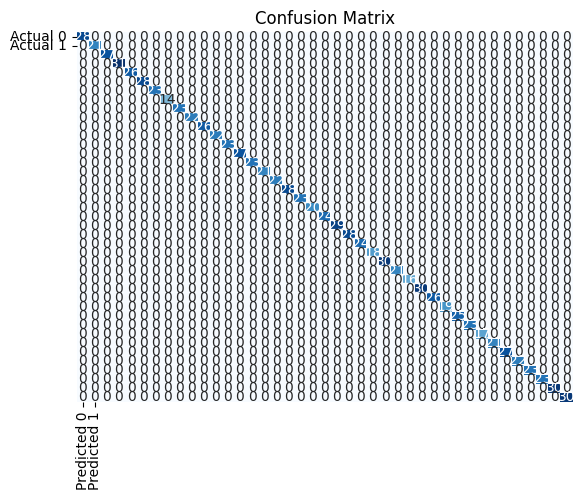

In [18]:
import seaborn as sns
sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.show()
#ax.set_title('Gaussian Naive Bayes')

In [19]:
prediction = nb.predict(X_test)
print(df.prognosis[prediction[0:10]].values)

['GERD' 'GERD' 'Allergy' 'Drug Reaction' 'Allergy' 'Chronic cholestasis'
 'GERD' 'Chronic cholestasis' 'GERD' 'Fungal infection']


In [20]:
symptoms

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf = rf.fit(x,y)

Logistic Regression

In [22]:
# Fitting Model
#from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y)

LogisticRegression()

Desicion Tree

In [23]:
from sklearn import tree
import statistics

dt = tree.DecisionTreeClassifier()   # empty model of the decision tree
dt = dt.fit(x,y)

In [24]:
# For all matched specific disease sympotms in general put 1 and unmatched put 0 
def predict_disease(input):
    # Initialize a list to store symptom binary values
    list_c = [0] * len(symptoms)
    
    # Check if each symptom in input matches with the symptoms list
    for z in range(len(symptoms)):
        for k in input:
            if k == symptoms[z]:
                list_c[z] = 1

    # Convert the list to a NumPy array
    test = np.array(list_c)
    
    # Reshape the array to have a single row
    test = test.reshape(1, -1)
    result=[]
    result.append(logreg.predict(test)[0])
    result.append(dt.predict(test)[0])
    result.append(rf.predict(test)[0])
    result.append(nb.predict(test)[0])
    
    # Make predictions using the Naive Bayes classifier (nb)
    return df.prognosis[statistics.mode(result)]
list_b = ['mood_swings','spotting_ urination']
print(predict_disease(list_b))

Fungal infection


C:\Users\srini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\srini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\srini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\srini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.

In [25]:
#Drug...
df2=pd.read_csv(r"C:\Users\srini\OneDrive\Desktop\disease2drug\dataset\Drug.csv")
df2.head

<bound method NDFrame.head of                                                    Drug Disease  Gender  Age
0                  A CN Gel(Topical) 20gmA CN Soap 75gm    Acne    Male   23
1     A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...    Acne    Male   23
2                                ACGEL CL NANO Gel 15gm    Acne    Male   23
3                                   ACGEL NANO Gel 15gm    Acne    Male   23
4                                 Acleen 1% Lotion 25ml    Acne    Male   23
...                                                 ...     ...     ...  ...
4950                          Zosovir 400mg Tablet 28'S    AIDS    Male   37
4951  Zoster 800mg Tablet 10'SZoster 5% Cream 5gmZos...    AIDS    Male   37
4952                                Zovilam Tablet 60'S    AIDS  Female   57
4953  Zovir 400mg Tablet 10'SZovir 200mg Tablet 10'S...    AIDS  Female   37
4954  Zovirax 250mg InjectionZovirax 200mg Tablet 5'...    AIDS  Female   57

[4955 rows x 4 columns]>

In [26]:
Drug_numeric={category:index for index,category in enumerate(df2['Drug'].unique())}
df2['Drug_numeric']=df2['Drug'].map(Drug_numeric)
df2['Gender'].replace({'Male':0,'Female':1},inplace=True)
Disease_numeric={ct:index for index,ct in enumerate(df2['Disease'].unique())}
df2['Disease_numeric']=df2['Disease'].map(Disease_numeric)
df2

,Drug,Disease,Gender,Age,Drug_numeric,Disease_numeric
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,0,23,0,0
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,0,23,1,0
2,ACGEL CL NANO Gel 15gm,Acne,0,23,2,0
3,ACGEL NANO Gel 15gm,Acne,0,23,3,0
4,Acleen 1% Lotion 25ml,Acne,0,23,4,0
...,...,...,...,...,...,...
4950,Zosovir 400mg Tablet 28'S,AIDS,0,37,4950,8
4951,Zoster 800mg Tablet 10'SZoster 5% Cream 5gmZos...,AIDS,0,37,4951,8
4952,Zovilam Tablet 60'S,AIDS,1,57,4952,8
4953,Zovir 400mg Tablet 10'SZovir 200mg Tablet 10'S...,AIDS,1,37,4953,8


In [27]:
y_drug=df2['Drug_numeric']
x_drug=df2.drop(['Drug','Disease','Drug_numeric'],axis=1)
x_drug

,Gender,Age,Disease_numeric
0,0,23,0
1,0,23,0
2,0,23,0
3,0,23,0
4,0,23,0
...,...,...,...
4950,0,37,8
4951,0,37,8
4952,1,57,8
4953,1,37,8


In [28]:
lst=df2['Disease'].unique()
lst=lst.tolist()
lst

['Acne',
 'Allergy',
 'Diabetes',
 'Fungal infection',
 'Urinary tract infection',
 'Malaria',
 'Migraine',
 'Hepatitis B',
 'AIDS']

In [29]:
from sklearn.ensemble import RandomForestClassifier
drug= RandomForestClassifier()
X_train, X_test, y_train, y_test=train_test_split(x_drug,y_drug,test_size=.2)
drug.fit(X_train,y_train)
drug.score(X_test,y_test)



0.0

In [30]:
df2.Drug[drug.predict([[0,23,8]])]

C:\Users\srini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


4811    OPTIVIRAL 200mg Tablet 10's
Name: Drug, dtype: object

In [31]:
# For all matched specific disease sympotms in general put 1 and unmatched put 0 
def predict_disease(input,gender,age):
    # Initialize a list to store symptom binary values
    list_c = [0] * len(symptoms)
    
    # Check if each symptom in input matches with the symptoms list
    for z in range(len(symptoms)):
        for k in input:
            if k == symptoms[z]:
                list_c[z] = 1

    # Convert the list to a NumPy array
    test = np.array(list_c)
    
    # Reshape the array to have a single row
    test = test.reshape(1, -1)
    result=[]
    result.append(logreg.predict(test)[0])
    result.append(dt.predict(test)[0])
    result.append(rf.predict(test)[0])
    result.append(nb.predict(test)[0])
    disease=df.prognosis[statistics.mode(result)]
    if disease in lst:
        index=lst.index(disease)
        return [disease,df2.Drug[drug.predict([[gender,age,index]])]]
    else:
        return [disease,'cunsult doctor']
list_b = ['mood_swings','spotting_ urination']
print(predict_disease(list_b,1,24))

['Fungal infection', 3841    Metasone Cream 15gmMetasone Cream 5gm
Name: Drug, dtype: object]


C:\Users\srini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\srini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\srini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\srini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.

Dumping the pickle file

In [32]:
# import pickle
# with open('SDM','wb') as file:
#     pickle.dump([drug,logreg,dt,rf,nb],file)


In [33]:
import json
symp={'colunms_data':[col.lower() for col in symptoms ]
      }

with open('symp.json',"w") as f:
   f.write(json.dumps(symp))

In [ ]:
import json
symp={'colunms_data':[col.lower() for col in symptoms ]
      }

with open('drug.json',"w") as f:
   f.write(json.dumps(lst))